In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
t_data = pd.read_csv('titanic_data.csv')
t_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked.
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
print("total number of passengers: " + str(len(t_data.index)))

total number of passengers: 891


<Axes: xlabel='Survived', ylabel='count'>

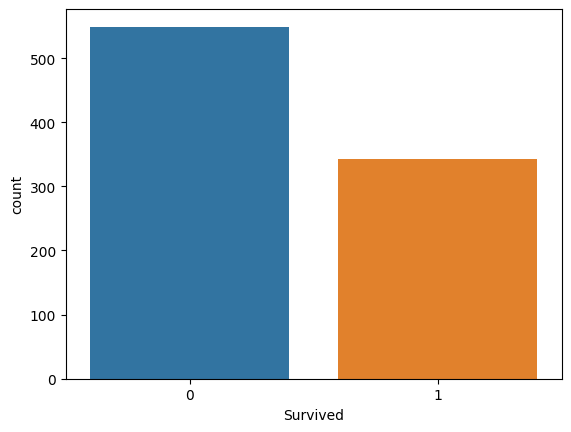

In [4]:
#Analysing data
sns.countplot(x= "Survived", data=t_data)

<Axes: xlabel='Survived', ylabel='count'>

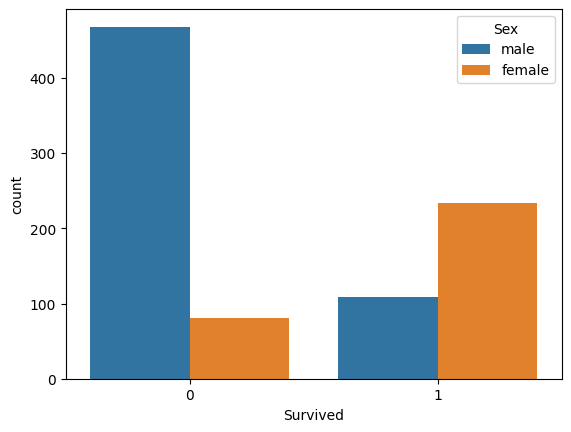

In [5]:
sns.countplot(x= "Survived",hue = "Sex", data=t_data)

<Axes: xlabel='Survived', ylabel='count'>

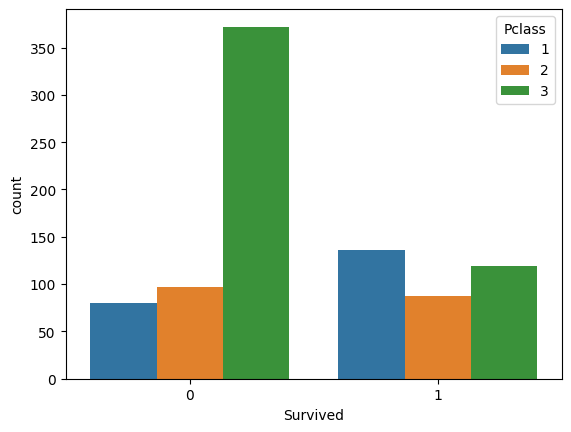

In [6]:
sns.countplot(x= "Survived", hue = "Pclass", data= t_data)

<Axes: ylabel='Frequency'>

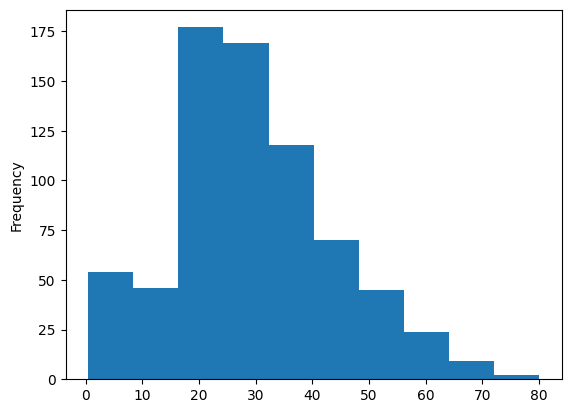

In [7]:
t_data["Age"].plot.hist()

<Axes: ylabel='Frequency'>

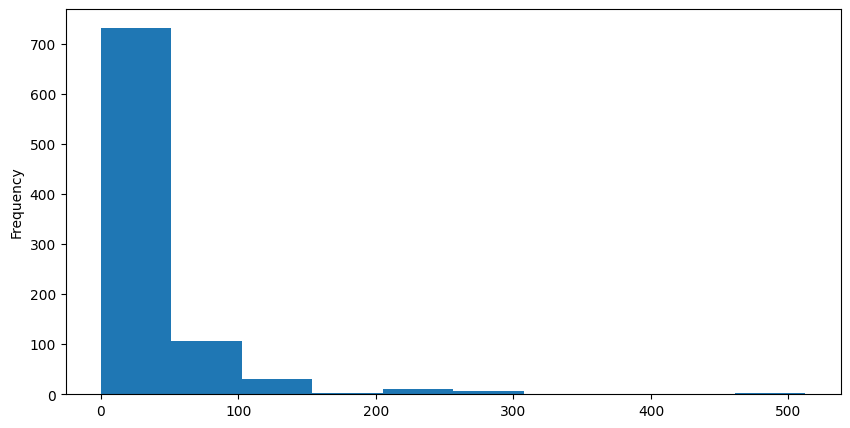

In [8]:
t_data["Fare"].plot.hist(figsize =(10,5))

In [9]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked.    889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

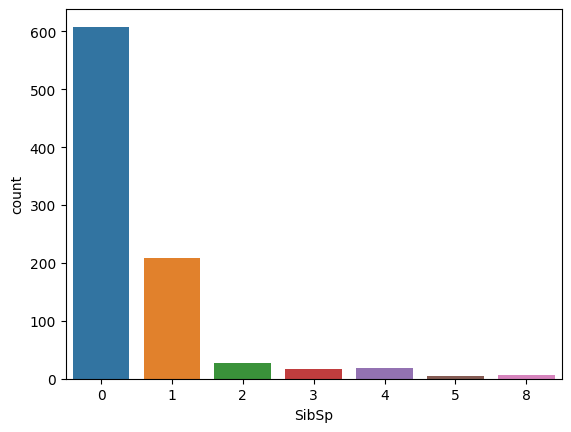

In [10]:
sns.countplot(x="SibSp", data=t_data)

In [11]:
#data wrangling
t_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked.
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
t_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked.        2
dtype: int64

<Axes: >

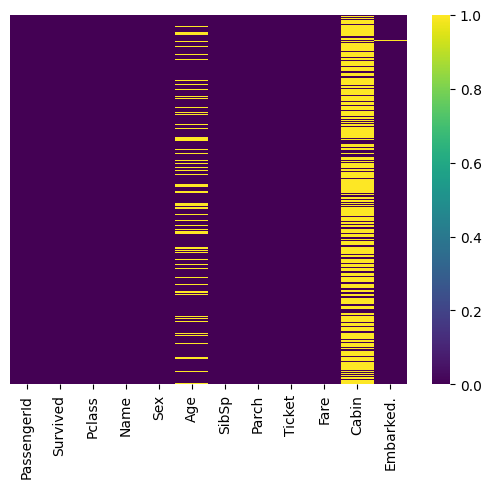

In [13]:
sns.heatmap(t_data.isnull(), yticklabels = False, cmap = "viridis")

<Axes: xlabel='Pclass', ylabel='Age'>

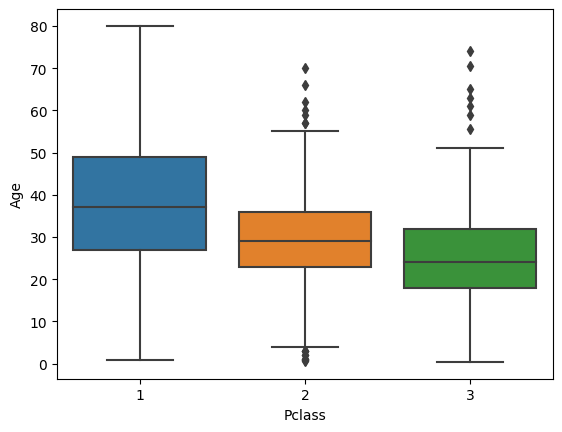

In [14]:
sns.boxplot(x="Pclass", y="Age", data=t_data)

In [15]:
t_data.drop("Cabin", axis=1, inplace = True)

In [16]:
t_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked.
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
t_data.dropna(inplace = True)

<Axes: >

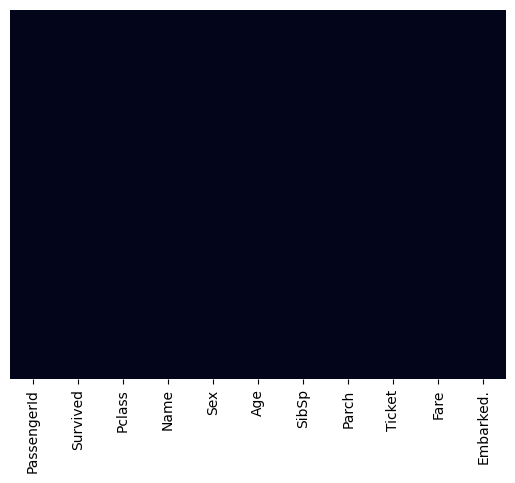

In [18]:
sns.heatmap(t_data.isnull(), yticklabels = False , cbar =False)

In [19]:
t_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked.      0
dtype: int64

In [20]:
sex=pd.get_dummies(t_data['Sex'], drop_first = True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [21]:
emb=pd.get_dummies(t_data["Embarked."], drop_first=True)
emb.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [22]:
pc=pd.get_dummies(t_data["Pclass"],drop_first=True)
pc.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [23]:
t_data=pd.concat([t_data,sex,emb,pc], axis = 1)
t_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked.,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [24]:
t_data.drop(["Pclass","Sex","PassengerId","Name","Ticket"], axis = 1)

,Survived,Age,SibSp,Parch,Fare,Embarked.,male,Q,S,2,3
0,0,22.0,1,0,7.2500,S,1,0,1,0,1
1,1,38.0,1,0,71.2833,C,0,0,0,0,0
2,1,26.0,0,0,7.9250,S,0,0,1,0,1
3,1,35.0,1,0,53.1000,S,0,0,1,0,0
4,0,35.0,0,0,8.0500,S,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,Q,0,1,0,0,1
886,0,27.0,0,0,13.0000,S,1,0,1,1,0
887,1,19.0,0,0,30.0000,S,0,0,1,0,0
889,1,26.0,0,0,30.0000,C,1,0,0,0,0


In [25]:
t_data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
885          886         0       3   
886          887         0       2   
887          888         1       1   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [26]:
#Train and Test
X = t_data.drop("Survived", axis=1)
y = t_data["Survived"]


In [27]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [30]:
print(X_train.dtypes)

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked.       object
male             uint8
Q                uint8
S                uint8
2                uint8
3                uint8
dtype: object


In [34]:
le = LabelEncoder()
X_train["Embarked."] = le.fit_transform(X_train["Embarked."])
X_test["Embarked."] = le.fit_transform(X_test["Embarked."])
X_train["Name"] = le.fit_transform(X_train["Name"])
X_test["Name"] = le.fit_transform(X_test["Name"])
X_train["Sex"] = le.fit_transform(X_train["Sex"])
X_test["Sex"] = le.fit_transform(X_test["Sex"])
X_train["Ticket"] = le.fit_transform(X_train["Ticket"])
X_test["ETicket"] = le.fit_transform(X_test["Ticket"])

In [31]:
for column in X_train.columns:
    if X_train["Name"].dtype == 'object':
        X_train["Name"] = le.fit_transform(X_train["Name"])

In [32]:
logmodel = LogisticRegression()


In [35]:
X_train.columns = X_train.columns.astype(str)
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
from sklearn.preprocessing import LabelEncoder

# Assuming y_train is your target variable for training

# Initialize LabelEncoder with classes parameter
le = LabelEncoder()
le.fit(y_train.unique())  # Use unique classes from y_train

# Transform target variables
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

In [37]:
le = LabelEncoder()
X_test["Name"] = le.fit_transform(X_test["Name"])
X_test["Embarked."] = le.fit_transform(X_test["Embarked."])
X_test["Sex"] = le.fit_transform(X_test["Sex"])
X_test["Ticket"] = le.fit_transform(X_test["Ticket"])

In [43]:
print(X_test.dtypes)
X_test.columns = X_test.columns.astype(str)

for column in X_test.columns:
    if X_test['Name'].dtype == 'object':
        X_test['Name'] = le.transform(X_test['Name'])
for column in X_test.columns:
    if X_test['Embarked.'].dtype == 'object':
        X_test['Embarked.'] = le.transform(X_test['Embarked.'])

for column in X_test.columns:
    if X_test['Ticket'].dtype == 'object':
        X_test['Ticket'] = le.transform(X_test['Ticket'])




# Make predictions
pred = logmodel.predict(X_test)

# Make predictions
pred = logmodel.predict(X_test)



PassengerId      int64
Pclass           int64
Name             int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket           int64
Fare           float64
Embarked.        int64
male             uint8
Q                uint8
S                uint8
2                uint8
3                uint8
dtype: object


In [44]:
from sklearn.metrics import classification_report

In [45]:
classification_report(y_test ,pred)

'              precision    recall  f1-score   support\n\n           0       0.78      0.82      0.80       125\n           1       0.73      0.67      0.70        89\n\n    accuracy                           0.76       214\n   macro avg       0.76      0.75      0.75       214\nweighted avg       0.76      0.76      0.76       214\n'

In [46]:
!pip install confusion_matrix
from sklearn.metrics import confusion_matrix

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 3.3 MB/s eta 0:00:00
  Created wheel for confusion_matrix: filename=confusion_matrix-0.1-py3-none-any.whl size=2401 sha256=146da5055389a07a8ad1c4a9e033023dc183d4bb798df529d198f4ac6b05a0c7
  Stored in directory: /root/.cache/pip/wheels/2a/86/a7/df011be982e86cf5084b4e47b183f46b0773f928abb5c12adb
Successfully built confusion_matrix


In [47]:
confusion_matrix(y_test, pred)

array([[103,  22],
       [ 29,  60]])

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test, pred)*100

76.16822429906543